## Sandip's CNN Model

Based on: https://fairyonice.github.io/achieving-top-23-in-kaggles-facial-keypoints-detection-with-keras-tensorflow.html

This model achieved modest performance in terms of Kaggle's leaderboard, with a top score of 4.43957. 

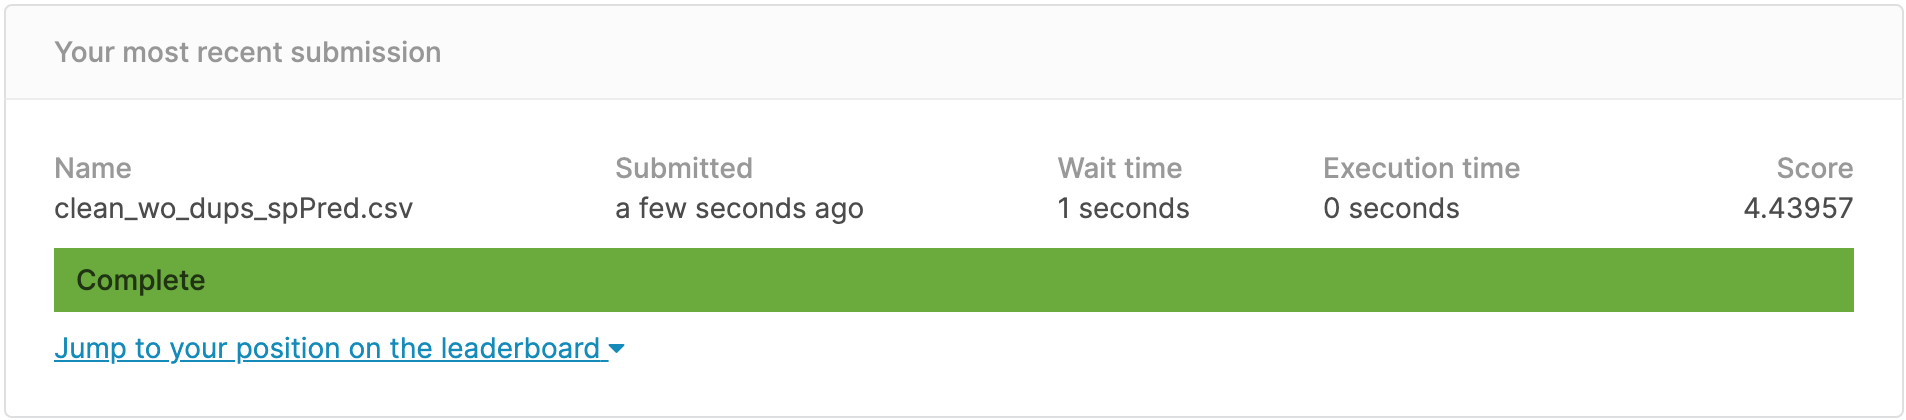




### Set the utils path to point to the utils directory locally

In [4]:

UTILS_PATH = "utils"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
import imp
import pickle

### Set the paths of where the clean file(s) are located

In [5]:
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models/", file_path)

trainer.print_paths()

Model dir: data/models/


### For every version of a clean Train file in a given path, create and save a model

The following cell is a base version.  No transformations to the data were applied and all layers were used from the model.
The following cell produced the prediction with the best result for the clean file named: clean_all_outliers.  This means that the train file that was cleaned by removing all outliers produced the best result with these settings. 

This cell looped through the directory of clean trail files which appears below and created a model for each file. Please refer to the Readme file for more information on each.

![](https://i.imgur.com/S7FhUkH.jpg)

Opening file:  clean_o_outliers.p
Train Shape: (7049, 31)
Begin model and train:
Model name: clean_o_outliers_sp
Scaling images
Scaling complete.
Number of images to be brightened: 7049
Number of images to be dimmed: 7049
Completed brighten and dim. Number of observations added to train: 14098
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 

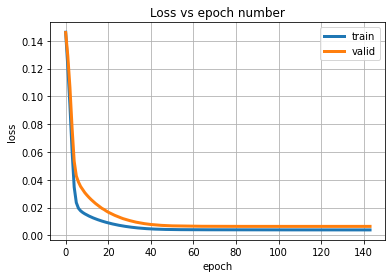

clean_o_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_sp
Scaling images
Scaling complete.
Number of images to be brightened: 7041
Number of images to be dimmed: 7041
Completed brighten and dim. Number of observations added to train: 14082
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 32)        0         
__________________

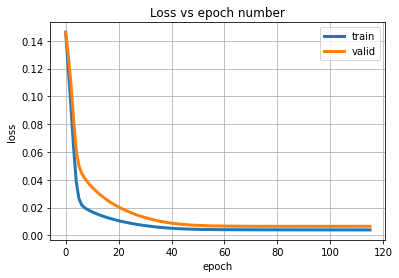

clean_w_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_sp
Scaling images
Scaling complete.
Number of images to be brightened: 7041
Number of images to be dimmed: 7041
Completed brighten and dim. Number of observations added to train: 14082
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 32)        0         
______________

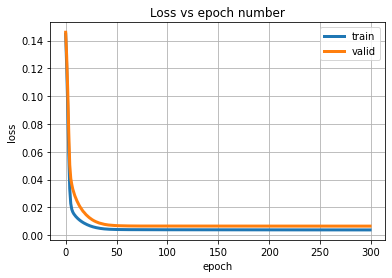

clean_all_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_sp
Scaling images
Scaling complete.
Number of images to be brightened: 6494
Number of images to be dimmed: 6494
Completed brighten and dim. Number of observations added to train: 12988
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 32)        0         
________________

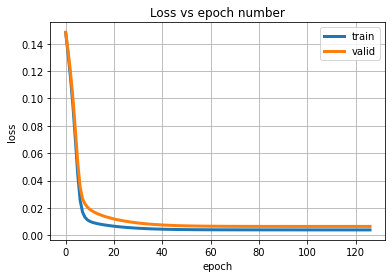

clean_duplicates_sp model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_sp
Scaling images
Scaling complete.
Number of images to be brightened: 6483
Number of images to be dimmed: 6483
Completed brighten and dim. Number of observations added to train: 12966
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)        0         
__________________________

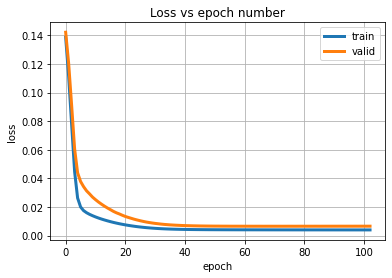

clean_o_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_sp
Scaling images
Scaling complete.
Number of images to be brightened: 6488
Number of images to be dimmed: 6488
Completed brighten and dim. Number of observations added to train: 12976
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 32)        0         
______________________________

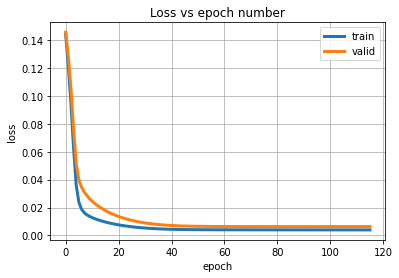

clean_w_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_sp
Scaling images
Scaling complete.
Number of images to be brightened: 6478
Number of images to be dimmed: 6478
Completed brighten and dim. Number of observations added to train: 12956
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_36 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 47, 47, 32)        0         
____________________________

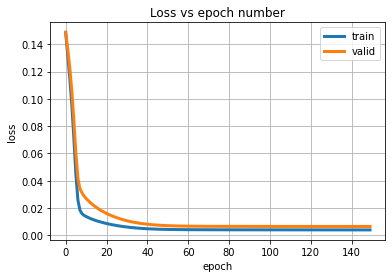

clean_wo_dups_sp model created and file saved for future use.
End model and train



In [6]:

files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)
    model, history = trainer.train_model(model_name, train_data,verbose = True)
    print("End model and train")    
    print()

### For every model file in a given path, predict using the model and save the predictions in CSV file

Following the cell above, it's now time to make some predictions.  The following cell loops through the directory and 

for each model (json file)
1. Create a prediction.  The predict_standard makes predictions and stores them in a pred_path location speficied.

Note: If you would like to run this cell, please update the paths accordingly. ### For every model file in a given path, predict using the model and save the predictions in CSV file

In [7]:


id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models/"
pred_path = "data/predictions/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test)
        print("End model and train")    
        print()


Model dir: data/models/
Pickle dir: data/predictions/
Working with:  clean_o_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_o_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_w_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_w_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_all_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_duplic